# Pokemon Go Veri Seti - Keşifsel Veri Analizi (EDA)

- **Kaynak:** Kaggle - PredictEmAll
- **Boyut:** ~296,000

## 1) Kurulum


In [ ]:
!pip -q install polars kagglehub matplotlib seaborn plotly

import polars as pl
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Görselleştirme ayarları
plt.style.use('ggplot')
sns.set_palette("husl")
np.random.seed(42)

print('Kütüphaneler yüklendi')


Kütüphaneler yüklendi
   Polars 1.31.0


## 2) Veri İndirme


In [ ]:
print("Veri seti indiriliyor...")
path = kagglehub.dataset_download("semioniy/predictemall")
print(f"İndirme tamamlandı: {path}")

files = glob.glob(f"{path}/*")
print("\nİndirilen dosyalar:")
for f in files:
    file_size = os.path.getsize(f) / (1024 * 1024)
    print(f"  - {os.path.basename(f)} ({file_size:.2f} MB)")


Veri seti indiriliyor...
Using Colab cache for faster access to the 'predictemall' dataset.
İndirme tamamlandı: /kaggle/input/predictemall

İndirilen dosyalar:
  - 300k_arff (0.00 MB)
  - 300k.csv (383.63 MB)
  - 300k.arff (379.26 MB)
  - 300k_csv (0.00 MB)


## 3) Veri Yükleme


In [ ]:
csv_files = glob.glob(f"{path}/*.csv")
DATA_PATH = csv_files[0]
print(f"Yüklenen dosya: {os.path.basename(DATA_PATH)}")

print("Veri yükleniyor...")
df = pl.read_csv(
    DATA_PATH,
    infer_schema_length=10000,
    ignore_errors=True,
    truncate_ragged_lines=True
)

print(f"\nVeri yüklendi")
print(f"   Satır: {df.height:,} | Kolon: {df.width}")
print(f"   Bellek: {df.estimated_size() / (1024**2):.2f} MB")


Yüklenen dosya: 300k.csv
Veri yükleniyor...

Veri yüklendi
   Satır: 296,021 | Kolon: 208
   Bellek: 105.02 MB


In [21]:
# Pokemon ID ve isim eşleştirmesini yükle
number_file_path = f"{path}/pokemonNumbers.csv"

if not os.path.exists(number_file_path):
    number_file_path = '/content/pokemonNumbers.csv'

if not os.path.exists(number_file_path):
    number_file_path = '../pokemonNumbers.csv'

if not os.path.exists(number_file_path):
    number_file_path = 'pokemonNumbers.csv'

try:
    pokemon_names = pl.read_csv(number_file_path,
                                 has_header=False,
                                 new_columns=['pokemonId', 'pokemonName'])
    print("Pokemon isimleri yüklendi")
    print(f"   Toplam: {pokemon_names.height} Pokemon")
    print(f"   Dosya yolu: {number_file_path}")
    pokemon_names.head(10)
except Exception as e:
    print(f"UYARI: Pokemon isim dosyası bulunamadı: {e}")
    print("   Boş bir DataFrame oluşturuldu, kod çalışmaya devam edecek")
    pokemon_names = pl.DataFrame({
        'pokemonId': [],
        'pokemonName': []
    }).cast({
        'pokemonId': pl.Int64,
        'pokemonName': pl.Utf8
    })


Pokemon isimleri yüklendi
   Toplam: 150 Pokemon
   Dosya yolu: /content/pokemonNumbers.csv


## 4) Temel İstatistikler


In [22]:
# Veri yapısı
print("Veri Yapısı")
print("=" * 70)
print(f"Satır sayısı: {df.height:,}")
print(f"Kolon sayısı: {df.width}")
print(f"\nİlk 5 kolon: {df.columns[:5]}")
print(f"...")
print(f"Son 5 kolon: {df.columns[-5:]}")

# İlk satırlar
print("\nİlk 3 satır:")
df.head(3)


Veri Yapısı
Satır sayısı: 296,021
Kolon sayısı: 208

İlk 5 kolon: ['pokemonId', 'latitude', 'longitude', 'appearedLocalTime', '_id']
...
Son 5 kolon: ['cooc_148', 'cooc_149', 'cooc_150', 'cooc_151', 'class']

İlk 3 satır:


pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,…,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
i64,f64,f64,str,str,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,str,i64,i64,i64,i64,bool,str,str,str,f64,f64,i64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64,…,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,i64
16,20.525745,-97.460829,"""2016-09-08T03:57:45""","""NTgxMDkzOTk4MTM5MjUwMjIzNw==""",null,null,null,null,null,null,null,"""night""",5,57,"""dummy_day""",8,8,2016,14,false,"""Mexico_City""","""America""","""Foggy""",25.5,4.79,269,1018.02,"""fog""",436,7,16,941,1181,19,41,-196,…,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,16
133,20.523695,-97.461167,"""2016-09-08T03:57:37""","""OTQ1NDgzODc1MjM3NDEzMTI2MQ==""",null,null,null,null,null,null,null,"""night""",5,57,"""dummy_day""",8,8,2016,14,false,"""Mexico_City""","""America""","""Foggy""",25.5,4.79,269,1018.02,"""fog""",436,7,16,941,1181,19,41,-196,…,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,133
16,38.90359,-77.19978,"""2016-09-08T03:57:25""","""NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==""",null,null,null,null,null,null,null,"""night""",5,57,"""dummy_day""",8,8,2016,13,false,"""New_York""","""America""","""Clear""",24.2,4.29,218,1015.29,"""clear-night""",404,6,44,1033,1171,19,31,-266,…,false,false,false,false,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,false,16


In [23]:
# Temel istatistikler (sayısal kolonlar için)
print("Sayısal Kolonlar - Temel İstatistikler")
print("=" * 70)

# Önemli kolonları seç
important_cols = ['latitude', 'longitude', 'appearedHour', 'temperature',
                  'windSpeed', 'pressure', 'populationDensity',
                  'gymDistanceKm', 'pokestopDistanceKm']

stats_cols = [col for col in important_cols if col in df.columns]
if stats_cols:
    df.select(stats_cols).describe()
else:
    print("İstatistik gösterilecek kolon bulunamadı")


Sayısal Kolonlar - Temel İstatistikler


## 5) Eksik Değer Analizi


Eksik Değer Analizi
Kolon                          Eksik      Yüzde     
--------------------------------------------------
cellId_90m                     131,238    44.33     %
cellId_180m                    131,238    44.33     %
cellId_370m                    131,238    44.33     %
cellId_730m                    131,238    44.33     %
cellId_1460m                   131,238    44.33     %
cellId_2920m                   131,238    44.33     %
cellId_5850m                   131,238    44.33     %
pokestopDistanceKm             39         0.01      %


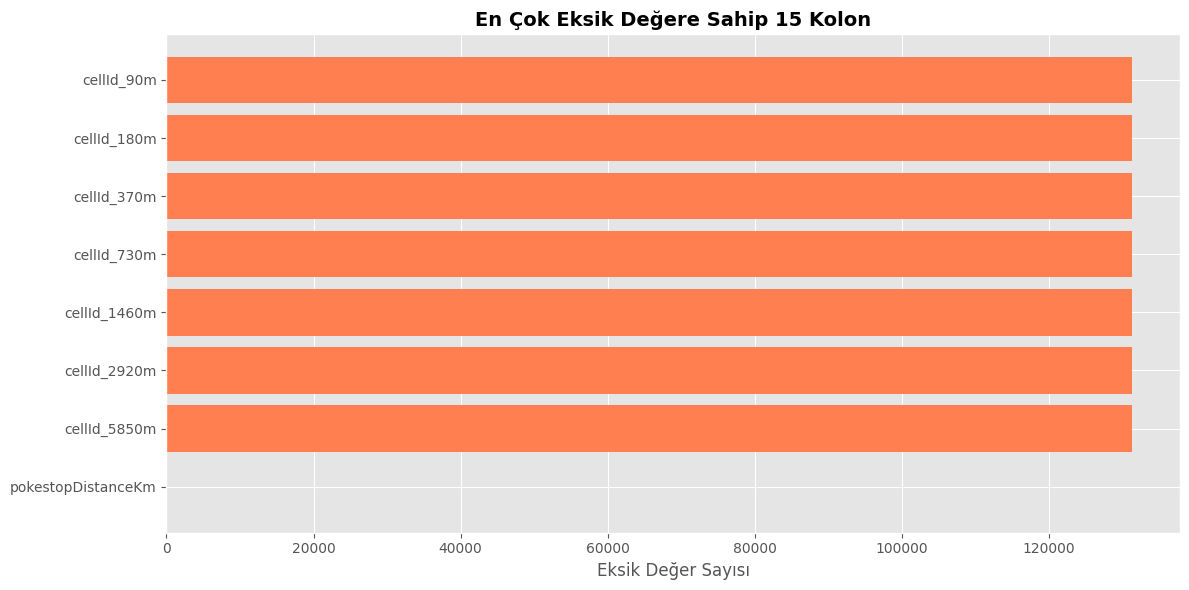

In [24]:
# Eksik değerleri kontrol et
print("Eksik Değer Analizi")
print("=" * 70)

total_rows = df.height
missing_data = []

for col in df.columns:
    null_count = df[col].null_count()
    if null_count > 0:
        null_pct = (null_count / total_rows) * 100
        missing_data.append((col, null_count, null_pct))

if missing_data:
    missing_data.sort(key=lambda x: x[1], reverse=True)
    print(f"{'Kolon':<30} {'Eksik':<10} {'Yüzde':<10}")
    print("-" * 50)
    for col, count, pct in missing_data[:10]:
        print(f"{col:<30} {count:<10,} {pct:<10.2f}%")

    if len(missing_data) > 10:
        print(f"... ve {len(missing_data) - 10} kolon daha")

    fig, ax = plt.subplots(figsize=(12, 6))
    top_missing = missing_data[:15]
    cols = [x[0][:20] for x in top_missing]
    counts = [x[1] for x in top_missing]

    ax.barh(cols, counts, color='coral')
    ax.set_xlabel('Eksik Değer Sayısı')
    ax.set_title('En Çok Eksik Değere Sahip 15 Kolon', fontsize=14, fontweight='bold')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("Hiç eksik değer yok!")


## 6) Pokemon Dağılımı


In [25]:
# En sık görülen Pokemonları bul
print("Pokemon Dağılımı")
print("=" * 70)

class_col = 'class'
if class_col in df.columns:
    # En sık görülen 20 Pokemon
    top_pokemon = df.group_by(class_col).agg(
        pl.len().alias("count")
    ).sort("count", descending=True).head(20)

    # Pokemon isimlerini ekle
    top_pokemon = top_pokemon.join(
        pokemon_names.rename({"pokemonId": class_col}),
        on=class_col,
        how="left"
    )

    print("\n En Sık Görülen 20 Pokemon:")
    print(top_pokemon)

    # Toplam istatistikler
    total_unique = df[class_col].n_unique()
    class_counts = df.group_by(class_col).agg(pl.len().alias("cnt"))
    max_count = class_counts["cnt"].max()
    min_count = class_counts["cnt"].min()

    print(f"\n Genel İstatistikler:")
    print(f"   Toplam farklı Pokemon türü: {total_unique}")
    print(f"   En çok görülen: {max_count:,} kez")
    print(f"   En az görülen: {min_count:,} kez")
    print(f"   Dengesizlik oranı: {max_count/min_count:.1f}x")
else:
    print("'class' kolonu bulunamadı")


Pokemon Dağılımı

 En Sık Görülen 20 Pokemon:
shape: (20, 3)
┌───────┬───────┬─────────────┐
│ class ┆ count ┆ pokemonName │
│ ---   ┆ ---   ┆ ---         │
│ i64   ┆ u32   ┆ str         │
╞═══════╪═══════╪═════════════╡
│ 16    ┆ 52114 ┆ Pidgey      │
│ 19    ┆ 39637 ┆ Rattata     │
│ 13    ┆ 27367 ┆ Weedle      │
│ 21    ┆ 12337 ┆ Spearow     │
│ 133   ┆ 11740 ┆ Eevee       │
│ …     ┆ …     ┆ …           │
│ 60    ┆ 3897  ┆ Poliwag     │
│ 118   ┆ 3842  ┆ Goldeen     │
│ 29    ┆ 3797  ┆ Nidoran F   │
│ 43    ┆ 3603  ┆ Oddish      │
│ 35    ┆ 3565  ┆ Clefairy    │
└───────┴───────┴─────────────┘

 Genel İstatistikler:
   Toplam farklı Pokemon türü: 144
   En çok görülen: 52,114 kez
   En az görülen: 1 kez
   Dengesizlik oranı: 52114.0x


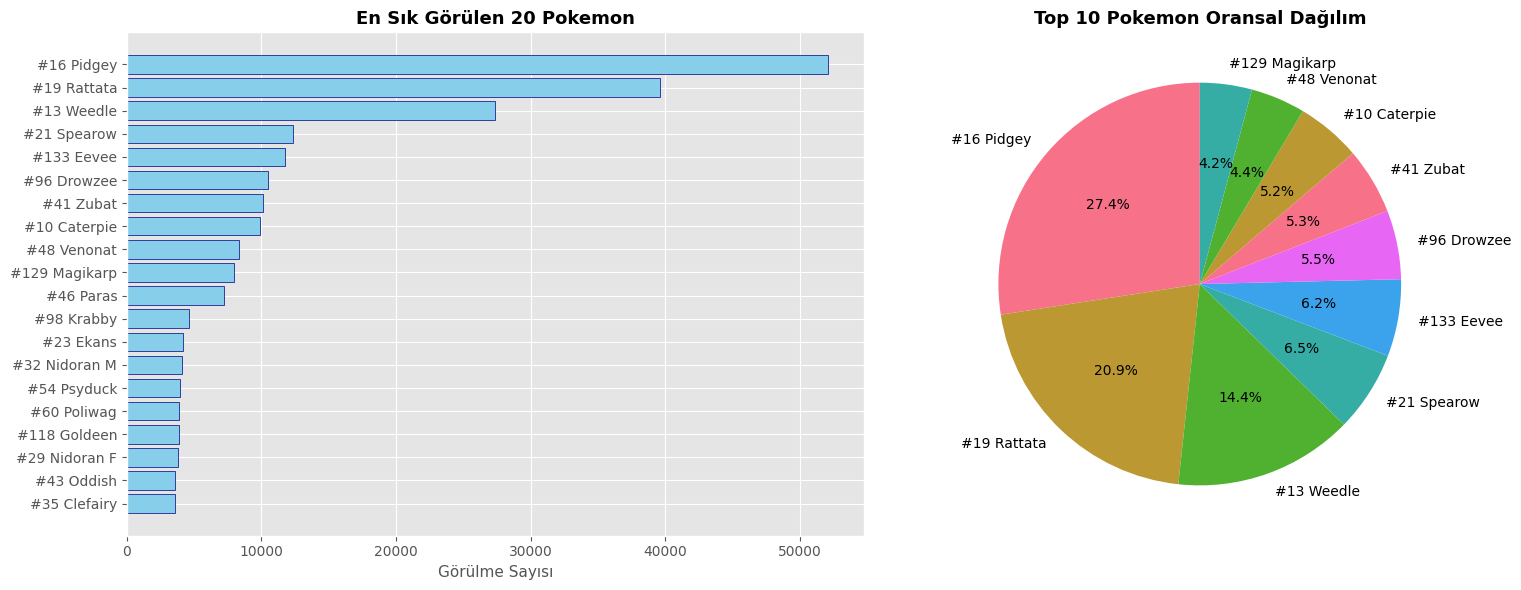

In [26]:
# Pokemon dağılımı görselleştirme
if class_col in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot - Top 20 Pokemon
    top_pd = top_pokemon.to_pandas()
    y_labels = [f"#{row[class_col]} {row['pokemonName']}" if row['pokemonName'] else f"#{row[class_col]}"
                for _, row in top_pd.iterrows()]

    ax1.barh(range(len(top_pd)), top_pd['count'], color='skyblue', edgecolor='navy')
    ax1.set_yticks(range(len(top_pd)))
    ax1.set_yticklabels(y_labels)
    ax1.set_xlabel('Görülme Sayısı', fontsize=11)
    ax1.set_title('En Sık Görülen 20 Pokemon', fontsize=13, fontweight='bold')
    ax1.invert_yaxis()

    # Pie chart - Top 10
    top10_pd = top_pd.head(10)
    labels = [f"#{row[class_col]} {row['pokemonName'][:8]}" if row['pokemonName'] else f"#{row[class_col]}"
              for _, row in top10_pd.iterrows()]

    ax2.pie(top10_pd['count'], labels=labels, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Top 10 Pokemon Oransal Dağılım', fontsize=13, fontweight='bold')

    plt.tight_layout()
    plt.show()


## 7) Zamansal Analiz


Zamansal Örüntüler

En Yoğun 5 Saat:
   Saat 04:00 - 16,691 görülme
   Saat 00:00 - 15,743 görülme
   Saat 23:00 - 15,157 görülme
   Saat 05:00 - 14,659 görülme
   Saat 01:00 - 14,622 görülme


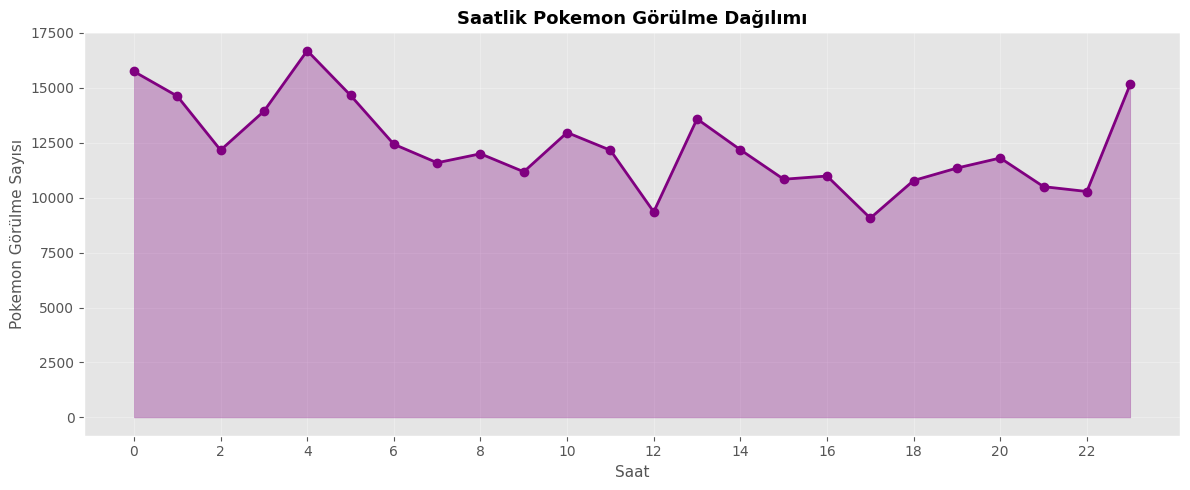

In [27]:
# Saatlik dağılım analizi
print("Zamansal Örüntüler")
print("=" * 70)

hour_col = 'appearedHour'

if hour_col in df.columns:
    hourly_dist = df.group_by(hour_col).agg(
        pl.len().alias("count")
    ).sort(hour_col)

    # En yoğun saatleri bul
    peak_hours = hourly_dist.sort("count", descending=True).head(5)
    print(f"\nEn Yoğun 5 Saat:")
    for row in peak_hours.iter_rows(named=True):
        print(f"   Saat {row[hour_col]:02d}:00 - {row['count']:,} görülme")

    # Görselleştirme
    plt.figure(figsize=(12, 5))

    # Saatlik dağılım
    hourly_pd = hourly_dist.to_pandas()
    plt.plot(hourly_pd[hour_col], hourly_pd['count'],
             marker='o', linewidth=2, markersize=6, color='purple')
    plt.fill_between(hourly_pd[hour_col], hourly_pd['count'], alpha=0.3, color='purple')
    plt.xlabel('Saat', fontsize=11)
    plt.ylabel('Pokemon Görülme Sayısı', fontsize=11)
    plt.title('Saatlik Pokemon Görülme Dağılımı', fontsize=13, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24, 2))

    plt.tight_layout()
    plt.show()
else:
    print("Saat kolonu bulunamadı")


## 8) Coğrafi Analiz


Coğrafi Dağılım

Koordinat Aralıkları:
   Latitude: -42.9845 - 68.4385
   Longitude: -159.3320 - 175.6162


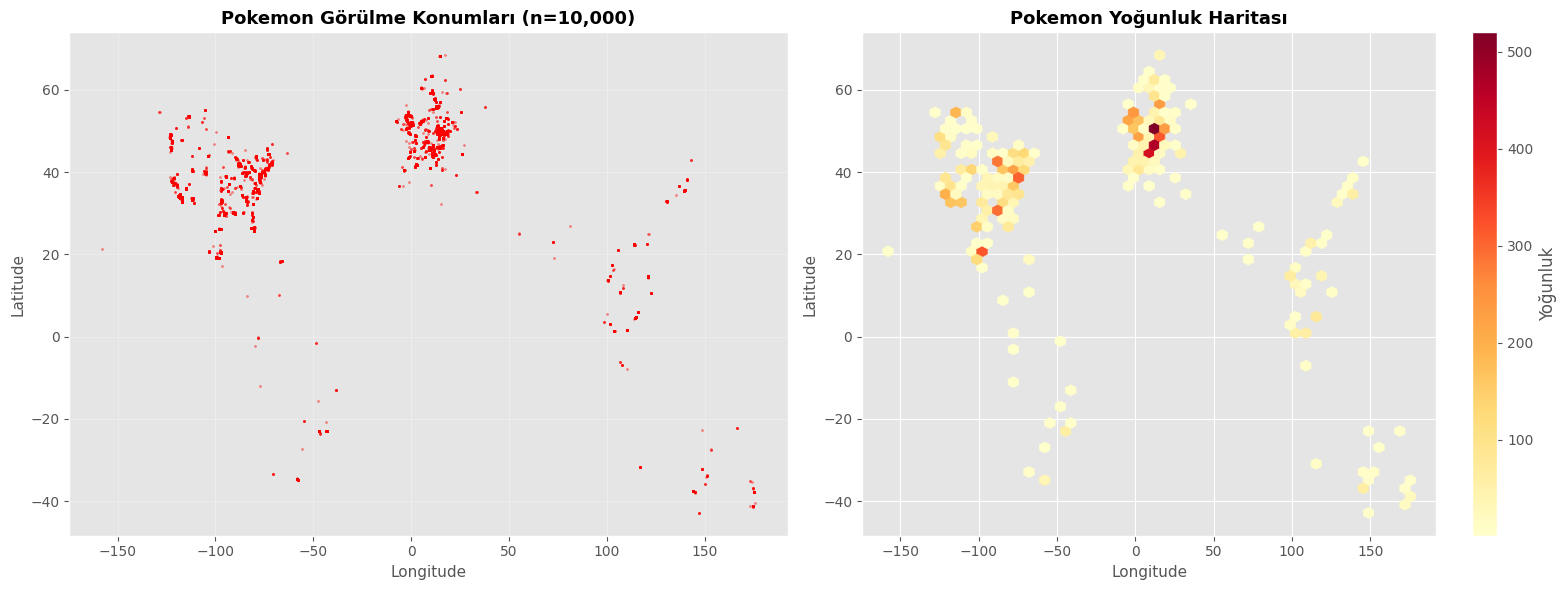


En Aktif 15 Şehir:
shape: (15, 2)
┌─────────────┬───────┐
│ city        ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ New_York    ┆ 54177 │
│ Chicago     ┆ 32046 │
│ Prague      ┆ 28000 │
│ Los_Angeles ┆ 22108 │
│ London      ┆ 19094 │
│ …           ┆ …     │
│ Edmonton    ┆ 6007  │
│ Oslo        ┆ 5910  │
│ Denver      ┆ 5619  │
│ Phoenix     ┆ 5429  │
│ Ljubljana   ┆ 5361  │
└─────────────┴───────┘


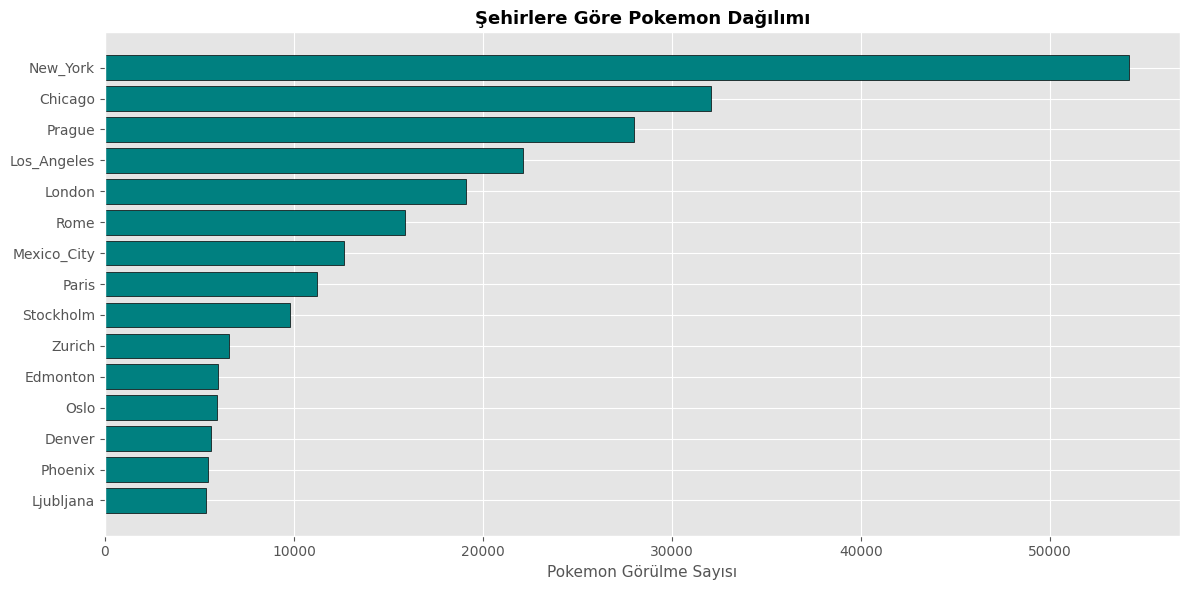

In [28]:
# Konumsal dağılım analizi
print("Coğrafi Dağılım")
print("=" * 70)

lat_col = 'latitude'
lon_col = 'longitude'
city_col = 'city'

if lat_col in df.columns and lon_col in df.columns:
    print(f"\nKoordinat Aralıkları:")
    print(f"   Latitude: {df[lat_col].min():.4f} - {df[lat_col].max():.4f}")
    print(f"   Longitude: {df[lon_col].min():.4f} - {df[lon_col].max():.4f}")

    sample_size = min(10000, df.height)
    df_sample = df.sample(n=sample_size, seed=42)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    scatter_data = df_sample.select([lat_col, lon_col]).to_pandas()
    ax1.scatter(scatter_data[lon_col], scatter_data[lat_col],
                alpha=0.4, s=2, c='red')
    ax1.set_xlabel('Longitude', fontsize=11)
    ax1.set_ylabel('Latitude', fontsize=11)
    ax1.set_title(f'Pokemon Görülme Konumları (n={sample_size:,})',
                  fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    hb = ax2.hexbin(scatter_data[lon_col], scatter_data[lat_col],
                    gridsize=50, cmap='YlOrRd', mincnt=1)
    ax2.set_xlabel('Longitude', fontsize=11)
    ax2.set_ylabel('Latitude', fontsize=11)
    ax2.set_title('Pokemon Yoğunluk Haritası', fontsize=13, fontweight='bold')
    plt.colorbar(hb, ax=ax2, label='Yoğunluk')

    plt.tight_layout()
    plt.show()

    if city_col in df.columns:
        city_dist = df.group_by(city_col).agg(
            pl.len().alias("count")
        ).sort("count", descending=True).head(15)

        print(f"\nEn Aktif 15 Şehir:")
        print(city_dist)

        fig, ax = plt.subplots(figsize=(12, 6))
        city_pd = city_dist.to_pandas()
        ax.barh(range(len(city_pd)), city_pd['count'], color='teal', edgecolor='black')
        ax.set_yticks(range(len(city_pd)))
        ax.set_yticklabels(city_pd[city_col])
        ax.set_xlabel('Pokemon Görülme Sayısı', fontsize=11)
        ax.set_title('Şehirlere Göre Pokemon Dağılımı', fontsize=13, fontweight='bold')
        ax.invert_yaxis()
        plt.tight_layout()
        plt.show()
else:
    print("Koordinat kolonları bulunamadı")


## 8.5) İnteraktif Geolocation Haritası


In [29]:
# İnteraktif animasyonlu Pokemon haritası
try:
    import plotly.express as px

    print("İnteraktif Harita Hazırlanıyor...")
    print("=" * 70)

    if 'appearedHour' in df.columns and lat_col in df.columns and lon_col in df.columns:
        print(f"\nVeri Örnekleme:")
        print(f"   Toplam veri: {df.height:,} satır")

        # Rastgele %5 örneklem al (0.05)
        df_plot = df.sample(fraction=0.05, seed=42).sort("appearedHour").to_pandas()
        print(f"   Örneklem: {len(df_plot):,} satır (%5)")

        print(f"\nHarita oluşturuluyor")

        # İnteraktif Animasyonlu Harita
        fig = px.scatter_geo(
            df_plot,
            lat=lat_col,
            lon=lon_col,
            color="class",              # Renklendirme (Pokemon türüne göre)
            hover_name="class",         # Üzerine gelince Pokemon ID
            animation_frame="appearedHour",  # Saate göre animasyon
            title="Saatlik Pokemon Hareketliliği (Global)",
            projection="natural earth",
            opacity=0.6,                # Yoğunluk için şeffaflık
            size_max=10,
            height=700
        )

        # Animasyon hızını ayarla (500ms her frame)
        fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500

        # Haritayı göster
        fig.show()
    else:
        print("UYARI: Gerekli kolonlar bulunamadı")
        print(f"   appearedHour: {'var' if 'appearedHour' in df.columns else 'yok'}")
        print(f"   {lat_col}: {'var' if lat_col in df.columns else 'yok'}")
        print(f"   {lon_col}: {'var' if lon_col in df.columns else 'yok'}")

except ImportError:
    print("UYARI: Plotly kütüphanesi yüklü değil!")
except Exception as e:
    print(f"Harita oluşturulurken hata: {e}")


İnteraktif Harita Hazırlanıyor...

Veri Örnekleme:
   Toplam veri: 296,021 satır
   Örneklem: 14,801 satır (%5)

Harita oluşturuluyor


## 9) Çevresel Faktörler


Çevresel Faktörler

Arazi Türü Dağılımı:
shape: (8, 2)
┌─────────────┬────────┐
│ terrainType ┆ count  │
│ ---         ┆ ---    │
│ i64         ┆ u32    │
╞═════════════╪════════╡
│ 13          ┆ 129458 │
│ 12          ┆ 39085  │
│ 14          ┆ 36189  │
│ 5           ┆ 31158  │
│ 0           ┆ 18387  │
│ 10          ┆ 12239  │
│ 8           ┆ 11110  │
│ 7           ┆ 9977   │
└─────────────┴────────┘

Suya Yakınlık:
   Suya yakın: 0.0%


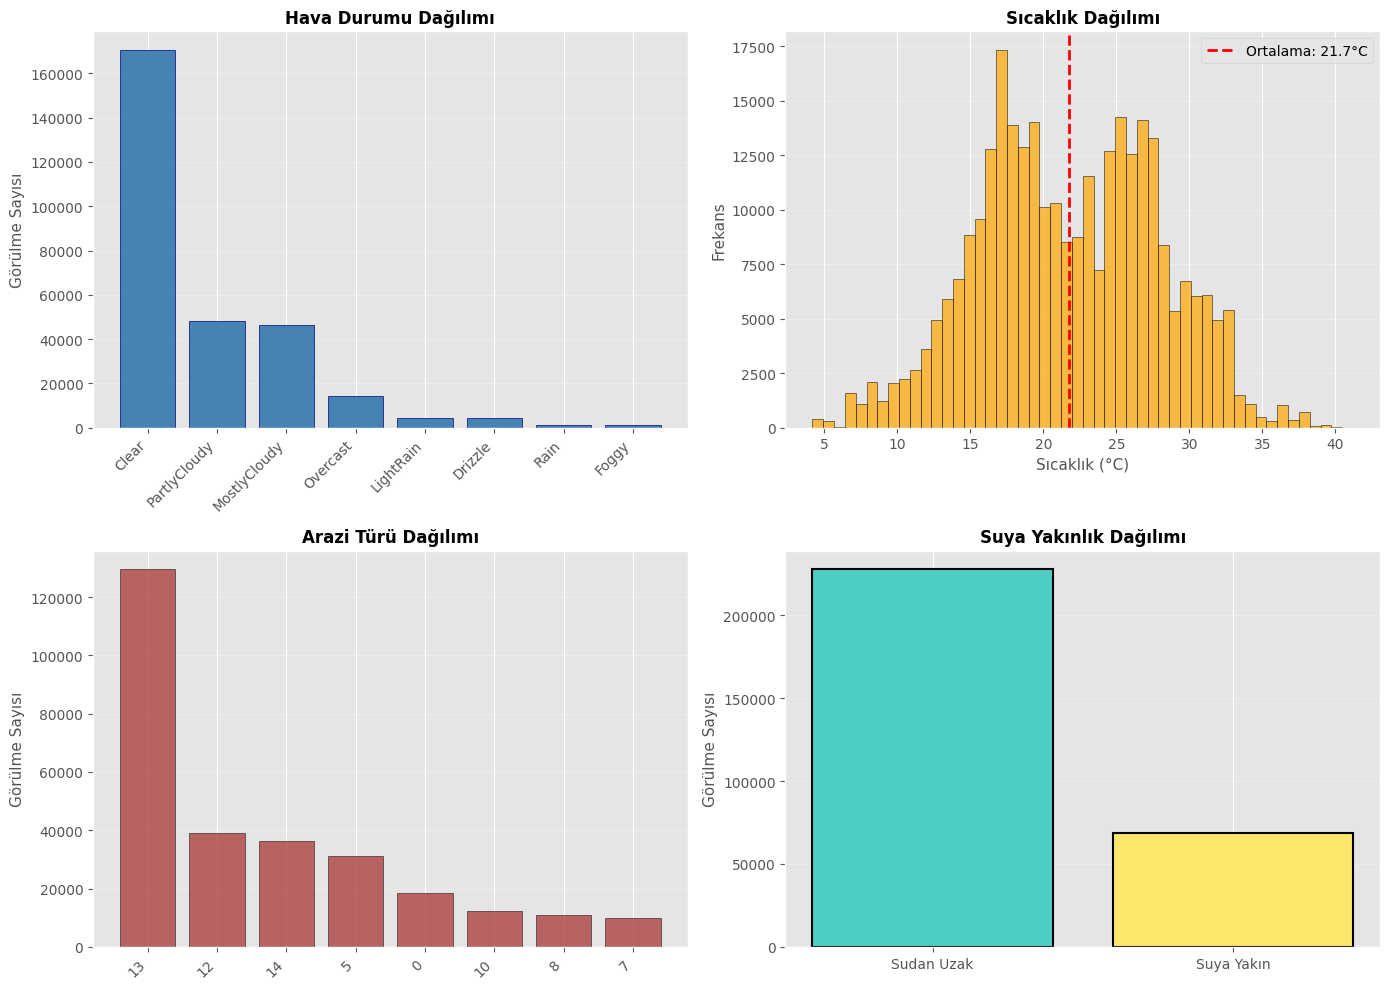

In [30]:
# Hava durumu ve çevresel faktörler
print("Çevresel Faktörler")
print("=" * 70)

weather_col = 'weather'
temp_col = 'temperature'
terrain_col = 'terrainType'
water_col = 'closeToWater'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

if weather_col in df.columns:
    weather_dist = df.group_by(weather_col).agg(
        pl.len().alias("count")
    ).sort("count", descending=True).head(8)

    weather_pd = weather_dist.to_pandas()
    axes[0].bar(range(len(weather_pd)), weather_pd['count'], color='steelblue', edgecolor='navy')
    axes[0].set_xticks(range(len(weather_pd)))
    axes[0].set_xticklabels(weather_pd[weather_col], rotation=45, ha='right')
    axes[0].set_ylabel('Görülme Sayısı', fontsize=11)
    axes[0].set_title('Hava Durumu Dağılımı', fontsize=12, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'Veri yok', ha='center', va='center', fontsize=14)
    axes[0].set_title('Hava Durumu')

if temp_col in df.columns:
    temp_data = df[temp_col].to_pandas()
    axes[1].hist(temp_data, bins=50, color='orange', edgecolor='black', alpha=0.7)
    axes[1].axvline(df[temp_col].mean(), color='red', linestyle='--', linewidth=2,
                       label=f'Ortalama: {df[temp_col].mean():.1f}°C')
    axes[1].set_xlabel('Sıcaklık (°C)', fontsize=11)
    axes[1].set_ylabel('Frekans', fontsize=11)
    axes[1].set_title('Sıcaklık Dağılımı', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Veri yok', ha='center', va='center', fontsize=14)
    axes[1].set_title('Sıcaklık')

if terrain_col in df.columns:
    terrain_dist = df.group_by(terrain_col).agg(
        pl.len().alias("count")
    ).sort("count", descending=True).head(8)

    terrain_pd = terrain_dist.to_pandas()
    axes[2].bar(range(len(terrain_pd)), terrain_pd['count'], color='brown', alpha=0.7, edgecolor='black')
    axes[2].set_xticks(range(len(terrain_pd)))
    axes[2].set_xticklabels(terrain_pd[terrain_col], rotation=45, ha='right')
    axes[2].set_ylabel('Görülme Sayısı', fontsize=11)
    axes[2].set_title('Arazi Türü Dağılımı', fontsize=12, fontweight='bold')
    axes[2].grid(axis='y', alpha=0.3)

    print(f"\nArazi Türü Dağılımı:")
    print(terrain_dist)
else:
    axes[2].text(0.5, 0.5, 'Veri yok', ha='center', va='center', fontsize=14)
    axes[2].set_title('Arazi Türü')

if water_col in df.columns:
    water_dist = df.group_by(water_col).agg(
        pl.len().alias("count")
    ).sort("count", descending=True)

    water_pd = water_dist.to_pandas()
    colors = ['#4ECDC4', '#FFE66D']  # Turkuaz ve sarı
    axes[3].bar(range(len(water_pd)), water_pd['count'],
                color=colors[:len(water_pd)], edgecolor='black', linewidth=1.5)
    axes[3].set_xticks(range(len(water_pd)))
    axes[3].set_xticklabels(['Suya Yakın' if x else 'Sudan Uzak' for x in water_pd[water_col]])
    axes[3].set_ylabel('Görülme Sayısı', fontsize=11)
    axes[3].set_title('Suya Yakınlık Dağılımı', fontsize=12, fontweight='bold')
    axes[3].grid(axis='y', alpha=0.3)

    if len(water_pd) > 0:
        water_pct = (water_pd.iloc[0]['count'] / df.height) * 100 if water_pd.iloc[0][water_col] else 0
        print(f"\nSuya Yakınlık:")
        print(f"   Suya yakın: {water_pct:.1f}%")
else:
    axes[3].text(0.5, 0.5, 'Veri yok', ha='center', va='center', fontsize=14)
    axes[3].set_title('Suya Yakınlık')

plt.tight_layout()
plt.show()


## 10) Özellik Korelasyonu


Korelasyon Analizi


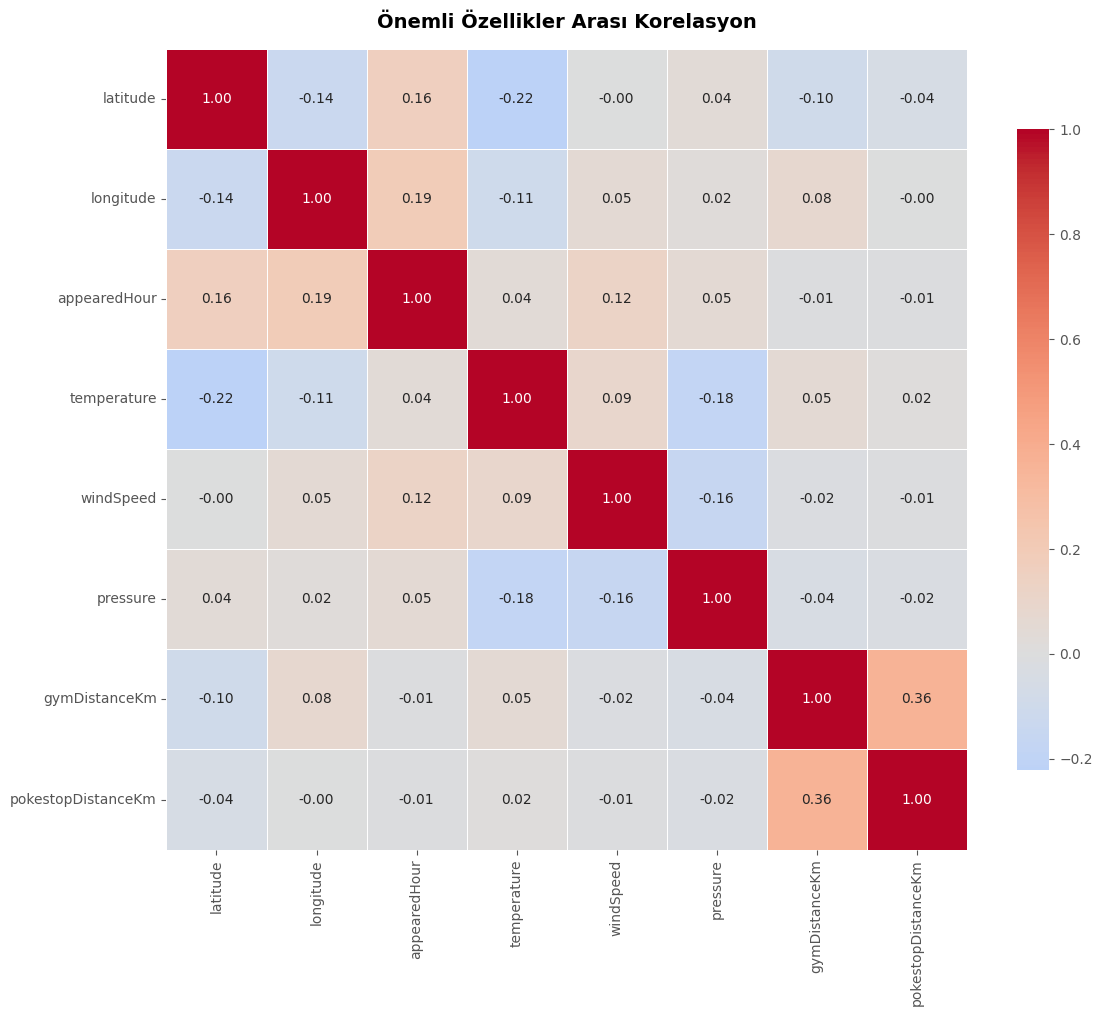


Güçlü Korelasyonlar (|r| > 0.5):
   Güçlü korelasyon bulunamadı


In [31]:
# Önemli özellikler arası korelasyon
print("Korelasyon Analizi")
print("=" * 70)

# Önemli sayısal kolonları seç (cellId ve cooc kolonları hariç )
important_cols = ['latitude', 'longitude', 'appearedHour', 'temperature',
                  'windSpeed', 'pressure', 'populationDensity',
                  'gymDistanceKm', 'pokestopDistanceKm']

available_cols = [col for col in important_cols if col in df.columns]

if len(available_cols) > 1:
    # Pandas'a çevir (korelasyon için)
    df_corr = df.select(available_cols).to_pandas()
    corr_matrix = df_corr.corr()

    # Görselleştirme
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
    ax.set_title('Önemli Özellikler Arası Korelasyon', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()

    # Yüksek korelasyonları listele
    print("\nGüçlü Korelasyonlar (|r| > 0.5):")
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.5:
                high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j],
                                 corr_matrix.iloc[i, j]))

    if high_corr:
        for col1, col2, corr_val in sorted(high_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"   {col1} <-> {col2}: {corr_val:.3f}")
    else:
        print("   Güçlü korelasyon bulunamadı")
else:
    print("Korelasyon analizi için yeterli kolon yok")


## 11) EDA Özeti


In [32]:
# EDA özet raporu
print("=" * 80)
print("VERİ ANALİZİ ÖZETİ".center(80))
print("=" * 80)

print(f"\nVERİ SETİ:")
print(f"   • Toplam kayıt: {df.height:,}")
print(f"   • Toplam özellik: {df.width}")
print(f"   • Bellek kullanımı: {df.estimated_size() / (1024**2):.2f} MB")

if class_col in df.columns:
    total_pokemon = df[class_col].n_unique()
    most_common_id = df.group_by(class_col).agg(pl.len().alias('cnt')).sort('cnt', descending=True)[0, class_col]

    name_result = pokemon_names.filter(pl.col('pokemonId') == most_common_id)
    most_common_name = name_result['pokemonName'][0] if len(name_result) > 0 else "Bilinmiyor"

    print(f"\nPOKEMON ÇEŞİTLİLİĞİ:")
    print(f"   • Farklı tür sayısı: {total_pokemon}")
    print(f"   • En sık görülen: #{most_common_id} {most_common_name}")

hour_col = 'appearedHour'
city_col = 'city'
weather_col = 'weather'
temp_col = 'temperature'

if hour_col in df.columns:
    peak_hour = df.group_by(hour_col).agg(pl.len().alias('cnt')).sort('cnt', descending=True)[0, hour_col]
    print(f"\nZAMANSAL ÖRÜNTÜLER:")
    print(f"   • En yoğun saat: {peak_hour}:00")

if city_col in df.columns:
    top_city = df.group_by(city_col).agg(pl.len().alias('cnt')).sort('cnt', descending=True)[0, city_col]
    total_cities = df[city_col].n_unique()
    print(f"\nCOĞRAFİ DAĞILIM:")
    print(f"   • En aktif şehir: {top_city}")
    print(f"   • Toplam şehir sayısı: {total_cities}")

if weather_col in df.columns:
    top_weather = df.group_by(weather_col).agg(pl.len().alias('cnt')).sort('cnt', descending=True)[0, weather_col]
    print(f"\nHAVA DURUMU:")
    print(f"   • En yaygın hava: {top_weather}")

if temp_col in df.columns:
    avg_temp = df[temp_col].mean()
    print(f"   • Ortalama sıcaklık: {avg_temp:.1f}°C")


                               VERİ ANALİZİ ÖZETİ                               

VERİ SETİ:
   • Toplam kayıt: 296,021
   • Toplam özellik: 208
   • Bellek kullanımı: 105.02 MB

POKEMON ÇEŞİTLİLİĞİ:
   • Farklı tür sayısı: 144
   • En sık görülen: #16 Pidgey

ZAMANSAL ÖRÜNTÜLER:
   • En yoğun saat: 4:00

COĞRAFİ DAĞILIM:
   • En aktif şehir: New_York
   • Toplam şehir sayısı: 98

HAVA DURUMU:
   • En yaygın hava: Clear
   • Ortalama sıcaklık: 21.7°C


## 13) Veriyi Kaydet


In [ ]:
PARQUET_PATH = "pokemon_clean.parquet"

print("Veri Parquet formatına kaydediliyor...")
print("=" * 70)

cooc_cols = [col for col in df.columns if col.startswith('cooc')]

if cooc_cols:
    print(f"\nSparse Kolon Optimizasyonu:")
    print(f"   Bulunan cooc kolonları: {len(cooc_cols)} adet")

    try:
        cooc_sum_expr = pl.sum_horizontal([pl.col(col).cast(pl.Int32).fill_null(0) for col in cooc_cols])
        df = df.with_columns(cooc_sum_expr.alias("nearby_pokemon_count"))
        print(f"   'nearby_pokemon_count' özelliği oluşturuldu")
    except Exception as e:
        print(f"    Özellik oluşturulamadı: {e}")

# Kolon ismi düzeltmesi: urban-rural -> urban_rural
if "urban-rural" in df.columns:
    df = df.rename({"urban-rural": "urban_rural"})

leakage_and_useless_cols = [
    'pokemonId',
    'appearedLocalTime',
    'weatherIcon',
    'continent',
    'city'
]

# cellId_500m'i KORU (Baseline Feature), diğer cellId kolonlarını sil
cell_id_cols = [col for col in df.columns if col.startswith('cellId') and col != 'cellId_500m']
print(f"   'cellId_500m' korundu (Baseline Spatial Feature)")
print(f"   Silinen diğer cellId kolonları: {len(cell_id_cols)} adet")

all_drop_cols = leakage_and_useless_cols + cell_id_cols + cooc_cols
final_drop_list = [col for col in all_drop_cols if col in df.columns]

df_clean = df.drop(final_drop_list)

print(f"\n Kolon Temizliği:")
print(f"   Silinen kolonlar: {len(final_drop_list)} adet")
print(f"   Kalan kolonlar: {df_clean.width} adet")

df_clean.write_parquet(PARQUET_PATH, compression="snappy")

parquet_size = os.path.getsize(PARQUET_PATH) / (1024 * 1024)
csv_size = os.path.getsize(DATA_PATH) / (1024 * 1024)

print(f"\n Kayıt Tamamlandı!")
print(f"   Dosya: {PARQUET_PATH}")
print(f"   Orijinal: {df.height:,} satır × {df.width} kolon")
print(f"   Temizlenmiş: {df_clean.height:,} satır × {df_clean.width} kolon")
print(f"   CSV boyutu: {csv_size:.2f} MB")
print(f"   Parquet boyutu: {parquet_size:.2f} MB")
print(f"   Sıkıştırma: {(1 - parquet_size/csv_size)*100:.1f}% azalma")
print(f"\n Bu dosya dağıtık işleme için hazır!")


Veri Parquet formatına kaydediliyor...

Sparse Kolon Optimizasyonu:
   Bulunan cooc kolonları: 151 adet
   'nearby_pokemon_count' özelliği oluşturuldu
   'cellId_500m' korundu (Baseline Spatial Feature)
   Silinen diğer cellId kolonları: 7 adet

 Kolon Temizliği:
   Silinen kolonlar: 163 adet
   Kalan kolonlar: 46 adet

 Kayıt Tamamlandı!
   Dosya: pokemon_clean.parquet
   Orijinal: 296,021 satır × 209 kolon
   Temizlenmiş: 296,021 satır × 46 kolon
   CSV boyutu: 383.63 MB
   Parquet boyutu: 20.86 MB
   Sıkıştırma: 94.6% azalma

 Bu dosya dağıtık işleme için hazır!


In [34]:
# Baseline Feature Set - Makine Öğrenmesi Modeli İçin Kullanılacak Feature'lar
print("Baseline Feature Set Tablosu Oluşturuluyor...")
print("=" * 70)

# Feature kategorileri ve feature'ları tanımla
baseline_features = [
    # Spatial (Mekansal)
    {"Kategori": "Spatial (Mekansal)", "Feature": "cellId_500m", "Açıklama": "500m hücre ID"},
    {"Kategori": "Spatial (Mekansal)", "Feature": "terrainType", "Açıklama": "Arazi türü"},
    {"Kategori": "Spatial (Mekansal)", "Feature": "closeToWater", "Açıklama": "Suya yakınlık"},
    {"Kategori": "Spatial (Mekansal)", "Feature": "populationDensity", "Açıklama": "Nüfus yoğunluğu"},
    {"Kategori": "Spatial (Mekansal)", "Feature": "urban_rural", "Açıklama": "Kentsel-kırsal"},

    # Temporal (Zamansal)
    {"Kategori": "Temporal (Zamansal)", "Feature": "appearedHour", "Açıklama": "Görülme saati"},
    {"Kategori": "Temporal (Zamansal)", "Feature": "appearedTimeOfDay", "Açıklama": "Günün zamanı"},
    {"Kategori": "Temporal (Zamansal)", "Feature": "appearedDayOfWeek", "Açıklama": "Haftanın günü"},

    # Weather
    {"Kategori": "Weather", "Feature": "weather", "Açıklama": "Hava durumu"},
    {"Kategori": "Weather", "Feature": "temperature", "Açıklama": "Sıcaklık"},

    # POI
    {"Kategori": "POI", "Feature": "pokestopDistanceKm", "Açıklama": "Pokestop mesafesi (km)"},
    {"Kategori": "POI", "Feature": "gymDistanceKm", "Açıklama": "Gym mesafesi (km)"},

    # Co-occurrence (İndirgenmiş)
    {"Kategori": "Co-occurrence (İndirgenmiş)", "Feature": "nearby_pokemon_count", "Açıklama": "Yakındaki Pokemon sayısı"}
]

# DataFrame oluştur
features_df = pl.DataFrame(baseline_features)

# CSV olarak kaydet
FEATURES_CSV_PATH = "baseline_features.csv"
features_df.write_csv(FEATURES_CSV_PATH)

print(f"\n✅ Feature tablosu oluşturuldu!")
print(f"   Toplam feature sayısı: {len(baseline_features)}")
print(f"   CSV dosyası: {FEATURES_CSV_PATH}")
print(f"\n📊 Feature Kategorileri:")
category_counts = features_df.group_by("Kategori").agg(pl.len().alias("Sayı"))
print(category_counts)

print(f"\n📋 Detaylı Feature Listesi:")
print(features_df)


Baseline Feature Set Tablosu Oluşturuluyor...

✅ Feature tablosu oluşturuldu!
   Toplam feature sayısı: 13
   CSV dosyası: baseline_features.csv

📊 Feature Kategorileri:
shape: (5, 2)
┌─────────────────────────────┬──────┐
│ Kategori                    ┆ Sayı │
│ ---                         ┆ ---  │
│ str                         ┆ u32  │
╞═════════════════════════════╪══════╡
│ Weather                     ┆ 2    │
│ Temporal (Zamansal)         ┆ 3    │
│ Co-occurrence (İndirgenmiş) ┆ 1    │
│ POI                         ┆ 2    │
│ Spatial (Mekansal)          ┆ 5    │
└─────────────────────────────┴──────┘

📋 Detaylı Feature Listesi:
shape: (13, 3)
┌─────────────────────────────┬──────────────────────┬──────────────────────────┐
│ Kategori                    ┆ Feature              ┆ Açıklama                 │
│ ---                         ┆ ---                  ┆ ---                      │
│ str                         ┆ str                  ┆ str                      │
╞═══════════════